# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [2]:
df=pd.read_excel('Online Retail.xlsx')

# Data Cleaning

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>From the Description it indicates that customer id has missing values so we have to remove it as it is an important column.</p>

In [4]:
df.dropna(subset=['CustomerID'],inplace=True)

In [5]:
df=df[df['UnitPrice']>0]

<p>We dropped the rows whose unitprice was 0</p>

In [6]:
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [7]:
df['IsReturn']=0
df.loc[df['Quantity']<0,'IsReturn']=1
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsReturn
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1


# Descriptive Statistics

In [8]:
df['TotalPrice']=df['Quantity']*df['UnitPrice'] # Calculating total price of each product
# Calculating total amount spent and total item purchased by each customer
grouped_data=df[df['IsReturn']==0].groupby('CustomerID')[['TotalPrice','Quantity']].sum().reset_index()
grouped_data.head()

,CustomerID,TotalPrice,Quantity
0,12346.0,77183.60,74215
1,12347.0,4310.00,2458
2,12348.0,1797.24,2341
3,12349.0,1757.55,631
4,12350.0,334.40,197


In [9]:
tamean=np.mean(grouped_data['TotalPrice'])
tamedian=np.median(grouped_data['TotalPrice'])
tastd=np.std(grouped_data['TotalPrice'])

In [10]:
timean=np.mean(grouped_data['Quantity'])
timedian=np.median(grouped_data['Quantity'])
tistd=np.std(grouped_data['Quantity'])

In [11]:
ds=pd.DataFrame({'Mean':[tamean,timean],
                 'Median':[tamedian,timedian],
                 'Standard Deviation':[tastd,tistd]},
                index=['TotalAmountSpent','TotalItemPurchased'])
ds

,Mean,Median,Standard Deviation
TotalAmountSpent,2054.266460,674.485,8988.194279
TotalItemPurchased,1191.289073,379.000,5045.499898


# Customer Segmentation 

In [12]:
# Calculating Average purchased value of each customer
grouped_avg=df[df['IsReturn']==0].groupby('CustomerID')['TotalPrice'].mean().reset_index()
grouped_avg.rename(columns={'TotalPrice':'AveragePurchaseValue'},inplace=True)
grouped_avg.head()

,CustomerID,AveragePurchaseValue
0,12346.0,77183.600000
1,12347.0,23.681319
2,12348.0,57.975484
3,12349.0,24.076027
4,12350.0,19.670588


In [13]:
last_purchase_date=df[df['IsReturn']==0].groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase_date.rename(columns={'InvoiceDate':'LastPurchaseDate'},inplace=True)
last_purchase_date.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [14]:
customer_data=grouped_data.merge(grouped_avg,on='CustomerID').merge(last_purchase_date,on='CustomerID')
customer_data.rename(
    columns={
        'TotalPrice':'TotalAmountSpent',
        'Quantity':'TotalItemPurchased'
    }
    ,inplace=True
)
customer_data.head()

,CustomerID,TotalAmountSpent,TotalItemPurchased,AveragePurchaseValue,LastPurchaseDate
0,12346.0,77183.60,74215,77183.600000,2011-01-18 10:01:00
1,12347.0,4310.00,2458,23.681319,2011-12-07 15:52:00
2,12348.0,1797.24,2341,57.975484,2011-09-25 13:13:00
3,12349.0,1757.55,631,24.076027,2011-11-21 09:51:00
4,12350.0,334.40,197,19.670588,2011-02-02 16:01:00


In [15]:
customer_data.to_csv('customer_data.csv',index=False)

In [16]:
cd=pd.read_csv('customer_data.csv')

In [17]:
#Prepare the data for clustering by selecting relevant features
features=cd[['TotalAmountSpent','TotalItemPurchased','AveragePurchaseValue']]

#Normalize the feature to ensure they are on the same scale
scalar=StandardScaler()
scaled_feature=scalar.fit_transform(features)

#Applying k-means clustering
kmeans=KMeans(n_clusters=3,random_state=42)
cd['Labels']=kmeans.fit_predict(scaled_feature)

#Mapping the segments to their respective value
cd['Labels']=cd['Labels'].map({
    0:'Inactive Customers',
    1:'Frequent Shoppers',
    2:'High Spenders'
})

cd.head()

,CustomerID,TotalAmountSpent,TotalItemPurchased,AveragePurchaseValue,LastPurchaseDate,Labels
0,12346.0,77183.60,74215,77183.600000,2011-01-18 10:01:00,Frequent Shoppers
1,12347.0,4310.00,2458,23.681319,2011-12-07 15:52:00,Inactive Customers
2,12348.0,1797.24,2341,57.975484,2011-09-25 13:13:00,Inactive Customers
3,12349.0,1757.55,631,24.076027,2011-11-21 09:51:00,Inactive Customers
4,12350.0,334.40,197,19.670588,2011-02-02 16:01:00,Inactive Customers


# Visualization

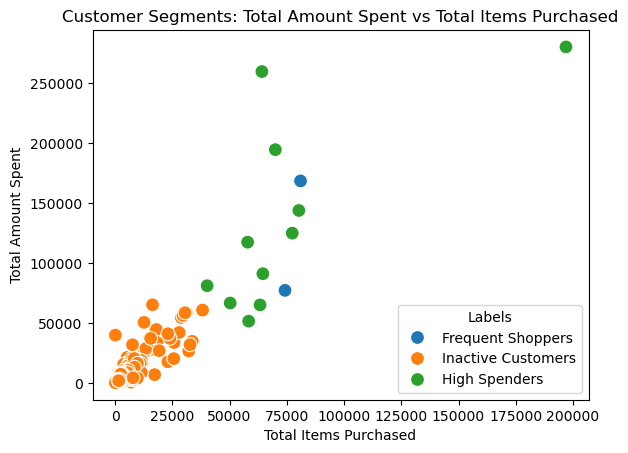

In [18]:
# Scatter plot for TotalAmountSpent vs TotalItemPurchased, colored by Labels
sns.scatterplot(x='TotalItemPurchased', y='TotalAmountSpent', hue='Labels', data=cd, s=100)
plt.title('Customer Segments: Total Amount Spent vs Total Items Purchased')
plt.xlabel('Total Items Purchased')
plt.ylabel('Total Amount Spent')
plt.legend(title='Labels')
plt.show()

# Customer Insights

<p>

1. Low Spenders: They spend less money overall & Purchase Fewer items on average. They may have low engagement with the brand or they might be the new customers who makes occasional purchase.

2. Frequent Spenders: They purchase more frequently but spend moderate amount overall. They buy items regularly but not in bulk. They may have consistent engagement with the brand.

3. High Spenders: They tend to spend significantly more money. They likely to buy more items and they may be important high value customers who have high level of trust in the brand.
</p>

# Customer Engagement Recommedations

<p>

1. Low Spenders: Brands can offer exclusive discounts to encourage them to make more purchases. if they haven't purchased in a while they can send an email with special promotion.

2. Frequent Shoppers: Brands can use targeted ads or emails to provide high value alternative of the product they buy frequently. Also provide some rewards for reaching certain thresholds and keep them engaged with new products or trends based on past purchases.

3. High Spenders: Brands can provide memberships campaign so that they can provide early access , exclusive products , and other benfits. They can provide pesonalized recommendations based on their spending amount and preferences.
</p>